In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [30]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [31]:
len(x_train)

60000

In [32]:
len(x_test)

10000

In [33]:
x_train[0].shape

(28, 28)

<Figure size 640x480 with 0 Axes>

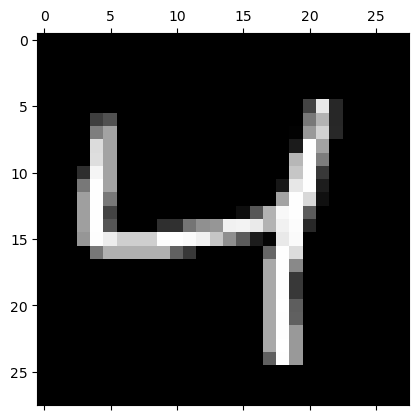

In [34]:
plt.gray()
plt.matshow(x_train[2])

In [35]:
y_train[2]

4

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
x_train=x_train/255

In [38]:
x_test=x_test/255

In [39]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_train_flatten.shape

(60000, 784)

In [40]:
x_test_flatten=x_test.reshape(len(x_test),28*28)
x_test_flatten.shape

(10000, 784)

In [41]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8121 - loss: 0.7113
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9137 - loss: 0.3130
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9197 - loss: 0.2825
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9236 - loss: 0.2753
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9260 - loss: 0.2622


In [42]:
y_predicted=model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [43]:
y_predicted[0]

array([3.28376740e-02, 4.20243822e-07, 6.81460947e-02, 9.58502352e-01,
       3.25658103e-03, 8.67745727e-02, 1.53198221e-06, 9.99843240e-01,
       1.06006674e-01, 7.08132267e-01], dtype=float32)

In [44]:
np.argmax(y_predicted[0])

7

In [45]:
y_test[0]

7

In [46]:
y_predicted_label= [np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [47]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [49]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    4,    5,    4,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,    9,  931,   12,   10,    1,   11,   12,   36,    3],
       [   4,    0,   21,  910,    1,   24,    2,   11,   30,    7],
       [   1,    1,    4,    1,  924,    0,   10,    4,   10,   27],
       [  12,    3,    5,   31,   12,  758,   17,    9,   38,    7],
       [  13,    3,    7,    1,    8,    9,  911,    2,    4,    0],
       [   1,    6,   22,    5,    9,    0,    0,  958,    3,   24],
       [   7,    6,    7,   15,    9,   17,   10,   11,  884,    8],
       [  11,    7,    1,    7,   35,    3,    0,   27,   11,  907]])>

Text(50.722222222222214, 0.5, 'Actual')

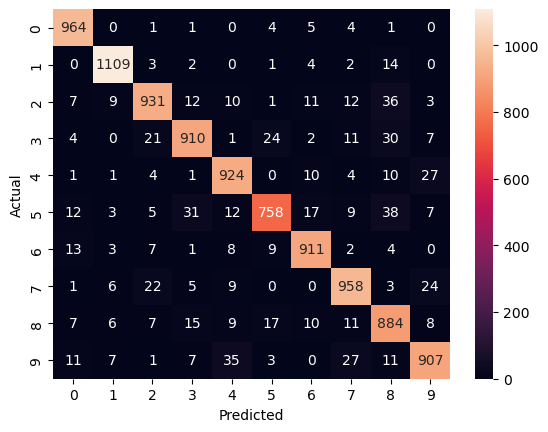

In [52]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [58]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    
    
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [59]:
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7569 - loss: 0.8576
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9099 - loss: 0.3156
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9174 - loss: 0.2892
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9257 - loss: 0.2683
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9305 - loss: 0.2487


In [60]:
y_predicted=model.predict(x_test_flatten)




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [61]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [62]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [63]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    4,    2,    3,    3,    3,    7,    1,    0],
       [   0, 1109,    3,    5,    0,    1,    5,    1,   11,    0],
       [   7,    6,  941,   25,   11,    1,   10,    9,   19,    3],
       [   1,    0,   19,  954,    3,    3,    0,   10,   14,    6],
       [   1,    2,    4,    2,  926,    0,   12,    4,    7,   24],
       [  12,    1,    1,   43,    9,  765,   19,    8,   27,    7],
       [   8,    4,    9,    1,    9,    5,  922,    0,    0,    0],
       [   2,    9,   23,   11,    8,    0,    0,  945,    0,   30],
       [   8,    3,   12,   33,   11,   19,   10,    9,  860,    9],
       [  11,    5,    2,   16,   32,    4,    0,   17,    2,  920]])>

<Axes: >

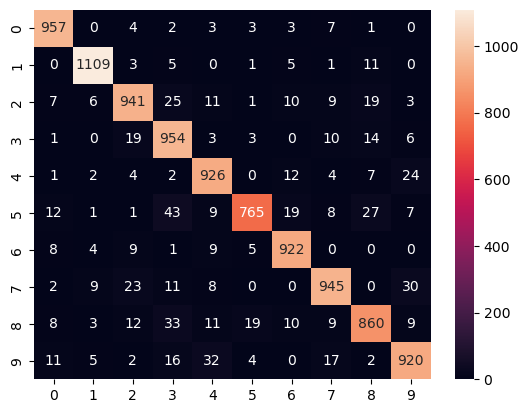

In [64]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')